In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [3]:
#To predict the cost from media.
#1. Data exploration

df=pd.read_csv("drive/My Drive/Colab Notebooks/Dataset/cost prediction in Foodmart.csv")
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [4]:
#Find shape
df.shape

(60428, 40)

In [5]:
#Check data info and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [ ]:
#Drop NaN
df.dropna(inplace=True)

In [6]:
#To check correlation between feature for feature reduction.
pd.options.display.float_format = "{:,.2f}".format

corr=df.corr()
sorted_corr = corr.unstack().sort_values(ascending=False)
sorted_corr[0:50]

store_sales(in millions)    store_sales(in millions)     1.00
unit_sales(in millions)     unit_sales(in millions)      1.00
avg_cars_at home(approx)    avg_cars_at home(approx)     1.00
                            avg_cars_at home(approx).1   1.00
num_children_at_home        num_children_at_home         1.00
avg_cars_at home(approx).1  avg_cars_at home(approx)     1.00
                            avg_cars_at home(approx).1   1.00
SRP                         SRP                          1.00
gross_weight                gross_weight                 1.00
net_weight                  net_weight                   1.00
recyclable_package          recyclable_package           1.00
units_per_case              units_per_case               1.00
store_sqft                  store_sqft                   1.00
grocery_sqft                grocery_sqft                 1.00
frozen_sqft                 frozen_sqft                  1.00
meat_sqft                   meat_sqft                    1.00
coffee_b

In [7]:
#Drop column with same correlation(=1) by selecting
# salad_bar
# meat_sqft 
# net_weight
# store_cost(in millions)
# grocery_sqft

df = df.drop(columns=['salad_bar', 'meat_sqft', 'net_weight', 'store_cost(in millions)', 'grocery_sqft'])
df.head()

,food_category,food_department,food_family,store_sales(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,...,store_city,store_state,store_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,4.00,Bag Stuffers,USA,M,F,1.00,...,Salem,OR,"27,694.00","5,415.00",1.00,1.00,1.00,1.00,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,3.00,Cash Register Lottery,USA,M,M,0.00,...,Salem,OR,"27,694.00","5,415.00",1.00,1.00,1.00,1.00,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,2.00,High Roller Savings,USA,S,F,4.00,...,Salem,OR,"27,694.00","5,415.00",1.00,1.00,1.00,1.00,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,2.00,Cash Register Lottery,USA,M,F,2.00,...,Salem,OR,"27,694.00","5,415.00",1.00,1.00,1.00,1.00,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,3.00,Double Down Sale,USA,M,M,0.00,...,Salem,OR,"27,694.00","5,415.00",1.00,1.00,1.00,1.00,Radio,50.79


In [8]:
#Check unique value for each feature for more understanding

# for col in list(df.select_dtypes(['object']).columns):
for col in list(df.columns):
    print(f'{col}, Unique value = {len(df[col].unique())}')
    print(f'{df[col].unique()} \n')
    

food_category, Unique value = 45
['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous'] 

food_department, Unique value = 22
['Frozen Foods' 'Baked Goods' 'Canned Foods' 'Baking Goods' 'Produce'
 'Snacks' 'Snack Foods' 'Dairy' 'Starchy Foods' 'Household'
 'Health and Hygiene' 'Meat' 'Beverages' 'Seafood' 'Deli'
 'Alcoholic Beverages' 'Canned Products' 'Eggs' 'Periodicals'
 'Breakfast

In [9]:
#Change some object type to numerical types in order to compute the features.

df[['cost', 'store_sales(in millions)','unit_sales(in millions)','total_children','avg_cars_at home(approx)',
   'SRP','gross_weight','units_per_case','store_sqft','frozen_sqft']] = df[['cost', 'store_sales(in millions)',
    'unit_sales(in millions)','total_children','avg_cars_at home(approx)','SRP','gross_weight','units_per_case',
    'store_sqft','frozen_sqft']].apply(pd.to_numeric)

In [10]:
#EDA 

df.describe().applymap(lambda x: f"{x:0.2f}")

,store_sales(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,cost
count,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00
mean,6.54,3.09,2.53,2.20,0.83,2.20,2.12,13.81,0.56,0.35,18.86,27988.48,5312.85,0.61,0.35,0.59,0.56,99.26
std,3.46,0.83,1.49,1.11,1.30,1.11,0.93,4.62,0.50,0.48,10.26,5701.02,1575.91,0.49,0.48,0.49,0.50,30.01
min,0.51,1.00,0.00,0.00,0.00,0.00,0.50,6.00,0.00,0.00,1.00,20319.00,2452.00,0.00,0.00,0.00,0.00,50.79
25%,3.81,3.00,1.00,1.00,0.00,1.00,1.41,9.70,0.00,0.00,10.00,23593.00,4746.00,0.00,0.00,0.00,0.00,69.65
50%,5.94,3.00,3.00,2.00,0.00,2.00,2.13,13.60,1.00,0.00,19.00,27694.00,5062.00,1.00,0.00,1.00,1.00,98.52
75%,8.67,4.00,4.00,3.00,1.00,3.00,2.79,17.70,1.00,1.00,28.00,30797.00,5751.00,1.00,1.00,1.00,1.00,126.62
max,22.92,6.00,5.00,4.00,5.00,4.00,3.98,21.90,1.00,1.00,36.00,39696.00,9184.00,1.00,1.00,1.00,1.00,149.75


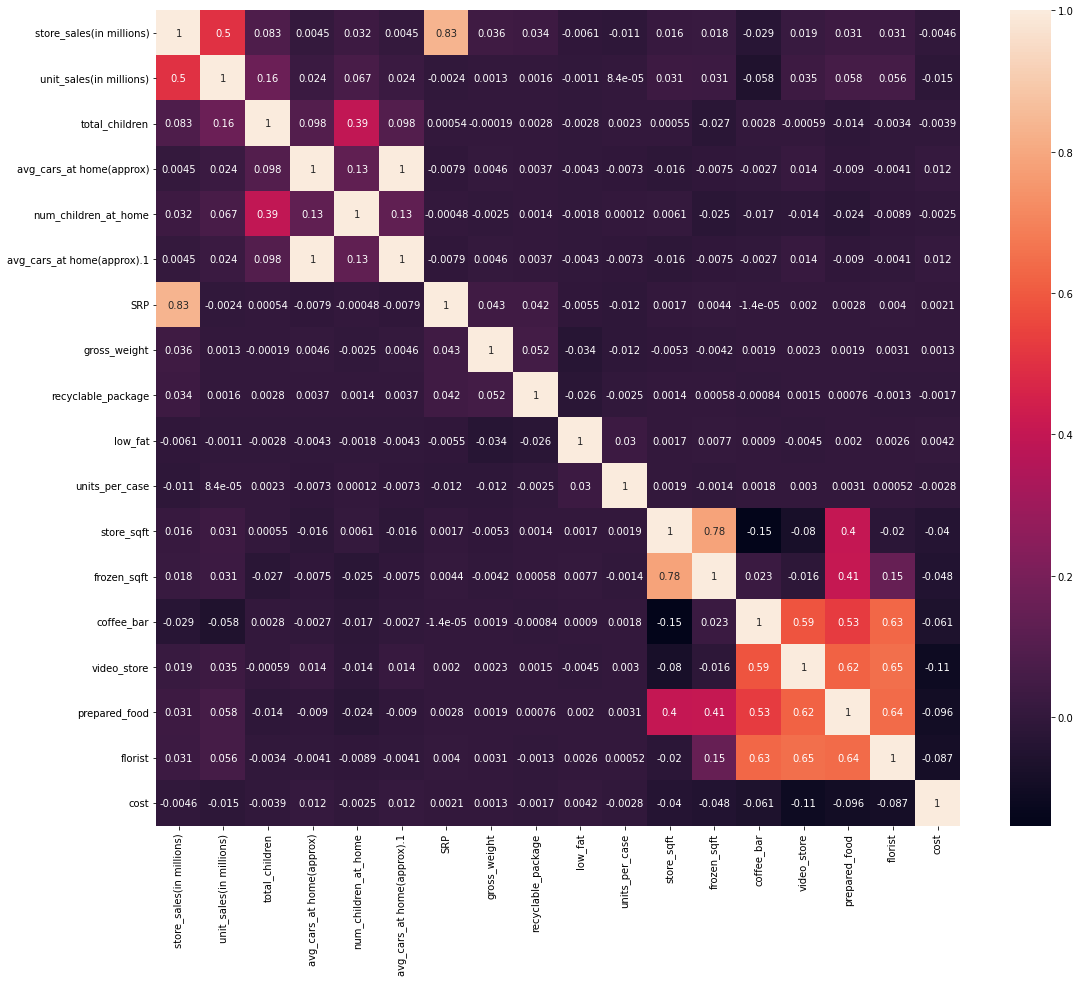

In [11]:
#EDA
#Heatmap

plt.figure(figsize=(18,15))
sns.heatmap(data=df.corr(), annot=True)


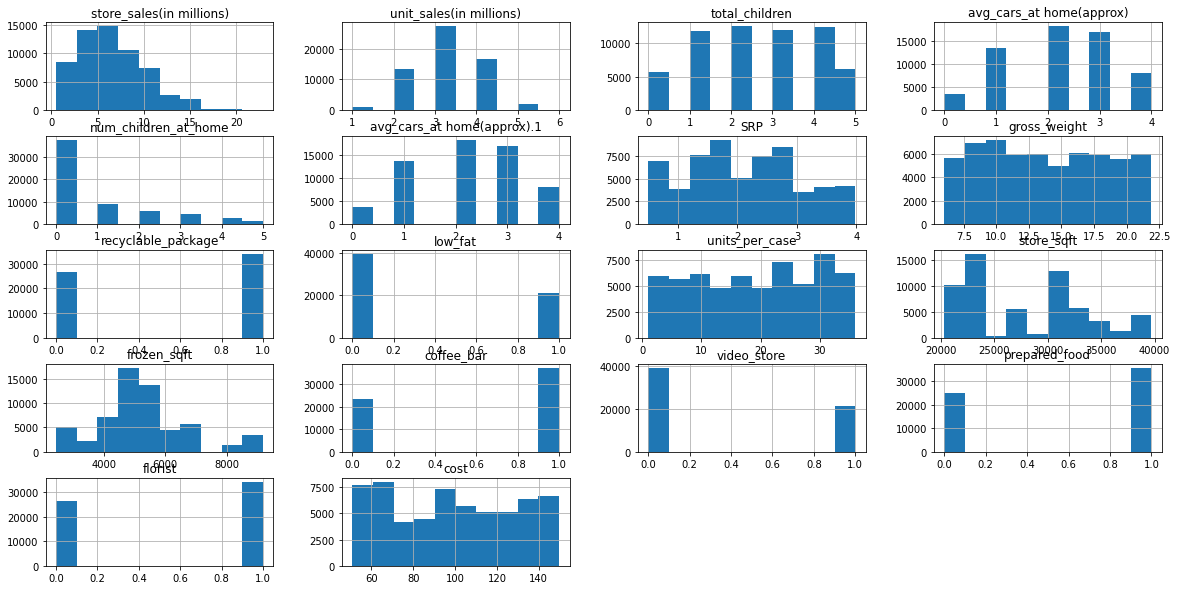

In [12]:
#EDA

plt.rcParams["figure.figsize"] = (20,10)
df.hist();

In [13]:
#Normalize numerical types and encoder together


import pandas as pd

# splitting input and output
X = df.drop(columns='cost')
y = df['cost']

# built selector
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)


from sklearn.preprocessing import OrdinalEncoder, StandardScaler

categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numerical_preprocessor = StandardScaler()

#create columntransformers to handle with each column.

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('Ordinalencoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)],remainder='passthrough')

#Built model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor ,RandomForestRegressor())

#4. splitting our data into train and test sets.
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    X, y, random_state=42)

#Train model

model.fit(data_train, target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['food_category',
                                                   'food_department',
                                                   'food_family',
                                                   'promotion_name',
                                                   'sales_country',
                                                   'marital_status', 'gender',
                                                   'education', 'member_card',
                                                   'occupation', 'houseowner',
                                                   'avg. yearly...
    

In [15]:

# evaluation 
target_predicted = model.predict(data_test)


print('Result from pre-process numerical by normalize')
print('MAE on Validation set :',metrics.mean_absolute_error(target_test, target_predicted))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(target_test, target_predicted))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(target_test, target_predicted)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(target_test, target_predicted))
print("\n")


Result from pre-process numerical by normalize
MAE on Validation set : 0.07296827960563347


MSE on Validation set : 0.9131245894433069


RMSE on Validation set : 0.2701264141205622


R2 Score on Validation set : 0.9989898400812187


